In [1]:
# This file is used to reduce noise of given data
import numpy as np
from matplotlib.pyplot import imshow
import copy
%matplotlib inline

In [2]:
# load data
test = np.genfromtxt("C:/Users/Think/Desktop/test/train1.csv",delimiter=',')

In [3]:
# select the features and labels of given data
def data_process(d, input_size = 429, class_size = 98):
    size = d.shape[0]
    example = d[:,9:]
    label = d[:, 1:2]
    label_matrix = np.zeros((size,class_size))
    for i in range(size):
        label_matrix[i][int(label[i])] = 1
    return example, label_matrix

In [4]:
t = copy.deepcopy(test)
example, label = data_process(t)

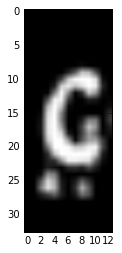

In [5]:
# show a image
i = 16
image = np.asarray(example[i:i+1].reshape([33,13]))
imshow(image,cmap='Greys_r')

In [6]:
# get the pixel value of a point in a matrix
def getPixel(image,x,y,G,N):  
    L = image[x,y]
    if L > G:  
        L = True  
    else:  
        L = False  
  
    nearDots = 0  
    if L == (image[x - 1,y - 1] > G):  
        nearDots += 1  
    if L == (image[x - 1,y] > G):  
        nearDots += 1  
    if L == (image[x - 1,y + 1] > G):  
        nearDots += 1  
    if L == (image[x,y - 1] > G):  
        nearDots += 1  
    if L == (image[x,y + 1] > G):  
        nearDots += 1  
    if L == (image[x + 1,y - 1] > G):  
        nearDots += 1  
    if L == (image[x + 1,y] > G):  
        nearDots += 1  
    if L == (image[x + 1,y + 1] > G):  
        nearDots += 1  
  
    if nearDots < N:  
        return 0
    else:  
        return None  

In [7]:
def clearNoise(image,G,N,Z,T):
       
    for i in xrange(0,Z):  
        for x in xrange(1,image.shape[0] - 1):  
            for y in xrange(1,image.shape[1] - 1):
                color = getPixel(image,x,y,G,N)
                if(color == 0):
                    image[x,y] = 255
                if(image[x,y] >= T):
                    image[x,y] = 255

In [8]:
# # turn multivalue to two values
# def monochrome(image):
#     for i in range(image.shape[0]):
#         for j in range(image.shape[1]):
#             if(image[i,j] >= 128):
#                 image[i,j] = 255
#             else:
#                 image[i,j] = 0

In [9]:
# remove the bound of given image
def removebound(image):
    image[0:1,:] = 255
    image[-1:,:] = 255
    image[:,0:1] = 255
    image[:,-1:] = 255

In [10]:
# process all data
example = 255-example # reverse the color of background and character
size = example.shape[0]
for i in range(size):
    image = np.asarray(example[i:i+1].reshape([33,13]))
    removebound(image)
    clearNoise(image,220,4,4,220)
example = 255-example

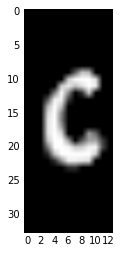

In [11]:
# show the result
i = 16
image = np.asarray(example[i:i+1].reshape([33,13]))
imshow(image,cmap='Greys_r')

In [12]:
# output processes data into a csv files
output = np.zeros((test.shape[0],test.shape[1]))
output[:,0:9] = test[:,0:9]
output[:,9:] = example
np.savetxt("C:/Users/Think/Desktop/tttttttttttttttttttt.csv",output,fmt='%d',delimiter=",")